In [69]:
from app import app
import folium
import csv
import sys
import numpy as np
import pandas as pd
import pdb
from folium.plugins import HeatMap

from flask import render_template
import os
import geopandas as gpd
from geo2cart import geo2cart


In [70]:
start_coords = (41.8333722, -87.628204)
folium_map = folium.Map(width=500,height=500, location=start_coords, tiles="Stamen Toner", zoom_start=10)

filepath = "app/static/Grocery_Stores_-_2013.csv"
boundaries_path = "app/static/neighborhoods.geojson"
data = pd.read_csv(filepath)
data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.LONGITUDE, data.LATITUDE))

data.crs={'init': 'epsg:4326'}
boundaries_df = gpd.read_file(boundaries_path)
boundaries_df['neighborhood'] = boundaries_df.sec_neigh.astype('category')

data_and_nbhood = gpd.sjoin(data, boundaries_df, op="within")

data_and_nbhood_copy = []
for store in data_and_nbhood.iterrows():
    store = store[1]
    store_temp = [store['LATITUDE'], store['LONGITUDE']]
    data_and_nbhood_copy.append(store_temp)

data_and_nbhood_copy_df = pd.DataFrame(data_and_nbhood_copy, columns=['LATITUDE', 'LONGITUDE'])

In [73]:
(minx, miny, maxx, maxy) = boundaries_df['geometry'][31].bounds
outer_bounds = [[minx, miny], [minx, maxy], [maxx, maxy], [maxx, miny]]
width = geodesic(outer_bounds[0], outer_bounds[1]).m
length = geodesic(outer_bounds[1], outer_bounds[2]).m


# Example of Plotting

In [142]:
import matplotlib.pyplot as plt

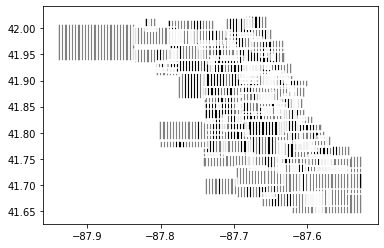

In [173]:
step = 500 #half a km
import random


class dim:
    steps = []
    max_dim = 0
    def __init__(self, steps):
        self.steps = steps
        self.max_dim = len(self.steps) - 1
        
def test(_min, _max, _steps):
    return (_max - _min)/_steps

def float_range(_min, _max, step_size, steps):
    _list = [_min+i*step_size for i in range(steps+1)]
    return _list

#list of steps including the last one
def create_step_list(distance, step_size):
    step_list = list(range(0,int(distance), step_size)) #list of "steps"
    if step_list[len(step_list) - 1] < distance:
        step_list.append(int(distance))
    return step_list

def get_color(x, y):
    grocery_stores_count = 0
    for index, store in data_and_nbhood_copy_df.iterrows():
        if geodesic([y, x], [store['LATITUDE'], store['LONGITUDE']]).m < 500:
            grocery_stores_count+=1
    if grocery_stores_count > 0:
        return 0
    return 5

#def create_grid_list():
    
def create_grid(i):
    (minx, miny, maxx, maxy) = boundaries_df['geometry'][i].bounds
    outer_bounds = [[minx, miny], [minx, maxy], [maxx, maxy], [maxx, miny]]
    width = geodesic(outer_bounds[0], outer_bounds[1]).m
    length = geodesic(outer_bounds[1], outer_bounds[2]).m
    y_dim = dim(create_step_list(width, step))
    x_dim = dim(create_step_list(length, step))
    
    step_size = test(minx, maxx, x_dim.max_dim)
    x_coord_list = float_range(minx, maxx, step_size, x_dim.max_dim)

    y_coords = float_range(miny, maxy, test(miny, maxy, y_dim.max_dim), y_dim.max_dim)

    poly_list = []
    for i in range(x_dim.max_dim):
        for j in range(y_dim.max_dim):
            #creates a polygon box using min, max coordinates
            poly = geometry.box(x_coord_list[i], y_coords[j], x_coord_list[i+1], y_coords[j+1], ccw=True)
            poly_list.append(poly)
            
    for poly in poly_list:
        xx, yy = poly.exterior.xy
        centroid_x, centroid_y = (poly.centroid.coords.xy[0][0], poly.centroid.coords.xy[1][0])
        #plt.plot(centroid_x, centroid_y, 'ro')
        plt.plot(xx, yy, solid_capstyle='round', color='white')
        color = get_color(centroid_x, centroid_y)
        plt.fill(xx, yy, str(color/10))
    
#create polygons
for i in range(0, 98):
    create_grid(i)

In [ ]:
#create a geoseries

In [162]:
boundaries_df.shape

(98, 6)

## Proof of Concept: Create Grid from Bounding Box

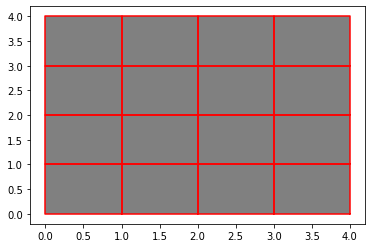

In [171]:
from shapely import geometry

x = np.arange(0, 5, 1)
y = np.arange(0, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=False)
poly_list = []
for i in range(len(x)-1):
    for j in range(len(y)-1):
        poly = geometry.box(x[i], y[j], x[i+1], y[j+1], ccw=True)
        poly_list.append(poly)
for poly in poly_list:
    xx, yy = poly.exterior.xy
    plt.plot(xx, yy, solid_capstyle='round', color='red')
    plt.fill(xx, yy, str(5/10))

